---  
  
**Phase 2 Final Project Group 002**  
  
Name: Nicku R. Perdana  
Batch: HCK-012  
Role: Data Analyst
  
This notebook documented data analysis process through a bank marketing report of an undisclosed Portugese banking corporation through an open dataset website Kaggle. The notebook will perform a preliminary analysis to develop a business understanding and a modeling basis for predicting a customer decision whether to be or not to be a newly bank customer.

---

# A. Import Libraries  
  
We will perform an analysis with helps from these listed libraries and configurations.

In [1]:
import opendatasets as od
import shutil
import pandas as pd
pd.set_option('display.max_column', None)
import matplotlib.pyplot as plt
import seaborn as sns

# B. Dataset Acquisition and Loading  
  
We will download the dataset from a kaggle provided via this link: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing; directly via notebook

## B1. Data Download

In [2]:
od.download(dataset_id_or_url='https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing')

Skipping, found downloaded files in ".\bank-marketing" (use force=True to force download)


In [3]:
# Copy file to notebook's root file
shutil.copyfile('bank-marketing/bank-additional-full.csv', 'bank-additional-full.csv')

'bank-additional-full.csv'

## B2. Data Loading

In [4]:
# Load dataset with pandas
raw_df = pd.read_csv('bank-additional-full.csv', sep=';')

# display the dataset first 5 records
display(raw_df.head(5))

# display the dataset information
raw_df.info()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Description: Every columns are having the correct data types.

## B3. Check Null Values

In [5]:
# Check null values
raw_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Description: There are no missing values as it has been manually altered using 'unknown' categories.

## B4. Check Duplicated Values

In [6]:
print(f'There are {raw_df.duplicated().sum()} duplicated records, as shown by this table below.')
raw_df[raw_df.duplicated() == True]

There are 12 duplicated records, as shown by this table below.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


The duplicated records tells nothing important hence we can simply drop them all.

## B5. Drop Duplicated Values

In [7]:
drop_df = raw_df.copy()
drop_df.drop_duplicates(inplace=True)
drop_df = drop_df.reset_index(drop=True)

drop_df.shape

(41176, 21)

Description: All duplicated values has been deleted.

# C. Data Understanding  
  
**Bank Client Data:**  
- `age` [numeric, continuous] : customer's age  
- `job` [string, categorical] : type of job  
  - `admin.`,
  - `blue-collar` (regular employee),
  - `entrepreneur`,
  - `housemaid`,
  - `management`,
  - `retired`,
  - `self-employed`,
  - `services`,
  - `student`,
  - `technician`,
  - `unemployed`,
  - `unknown` (those who chose unanswer)  
- `marital` [string, categorical] : marital status  
  - `divorced` (includes divorced or widowed status),
  - `married`,
  - `single`,
  - `unknown` (those who chose unanswer)  
- `education` [string, categorical] : Educational background (graduated status)  
  - `basic.4y` (Four-years elementary school),
  - `basic.6y` (Six-years elementary school),
  - `basic.9y` (Nine-years graduating junior high school),
  - `high.school` (graduating senior high school),
  - `illiterate` (not attending formal education),
  - `professional.course` (vocational school, specialist school, etc.),
  - `university.degree` (graduate, post-graduate, post-doctorate),
  - `unknown` (those who chose unanswer)  
- `default` [string, categorical]: has credit in default?  
  - `no`,
  - `yes`,
  - `unknown` (those who chose unanswer)  
- `housing` [string, categorical] : has housing loan?
  - `no`,
  - `yes`,
  - `unknown` (those who chose unanswer)  
- `loan`: has personal loan?  
  - `no`,
  - `yes`,
  - `unknown` (those who chose unanswer)   
    
**Related with the last contact of the current campaign**  
  
- `contact` [string, categorical] : contact communication type   
  - `cellular` (cellular phone/smartphone),
  - `telephone` (wired telephone)  
- `month` [string, categorical] : last contact month of year  
  - `jan` (January),
  - `feb` (February),
  - `mar` (March),
  - `apr` (April),
  - `may` (May),
  - `jun` (June),
  - `jul` (July),
  - `aug` (August),
  - `sep` (September),
  - `oct` (October),
  - `nov` (November),
  - `dec` (December),  
- `day_of_week` [string, categorical] : last contact day of the week  
  - `mon` (Monday),  
  - `tue` (Tuesday),  
  - `wed` (Wednesday),  
  - `thu` (Thursday),  
  - `fri` (Friday),  
- `duration` [numeric, continuous] : last contact duration, in seconds.  
  - This attribute highly affects the output target (e.g., if duration=0 then y=`no`).  
  - Yet, the duration is not known before a call is performed.  
  - Also, after the end of the call `y` is obviously known.  
  - Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
  
**Other attributes**  
  
- `campaign` [numeric, continuous] : number of contacts performed during this campaign and for this client  
- `pdays` [numeric, categorical] : number of days that passed by after the client was last contacted from a previous campaign
  - `999` means client was not previously contacted  
- `previous` [numeric, categorical] : number of contacts performed before this campaign and for this client  
- `poutcome` [string, categorical] : outcome of the previous marketing campaign  
  - `failure` (fail to acquire),
  - `nonexistent` (unconfirmed),
  - `success` (customer acquired)  
  
**Social and economic context attributes**  
  
- `emp.var.rate` [numeric, continuous] : employment variation rate, quarterly indicator  
  - "Employment variation number" typically refers to a metric used to measure changes in employment levels over a specific period.  
  - An employment variation rate of 1.1 indicates a 10% increase in employment levels over a specific period compared to a reference point. Here's an example of how to interpret this:
  - Let's say a country's employment variation rate for the first quarter of 2023 is reported as 1.1. This means that compared to the same period in the previous year (the reference point), employment levels have increased by 10%.
  - For instance, if there were 1 million people employed in the first quarter of 2022, a variation rate of 1.1 would mean that there are now 1.1 million people employed in the first quarter of 2023.
  - This increase could signify positive economic growth, increased business activity, or improved labor market conditions during that period. It's important to analyze this rate in conjunction with other economic indicators and factors to gain a comprehensive understanding of the employment situation.
- `cons.price.idx` [numeric, continuous] : consumer price index, monthly indicator
  - A Consumer Price Index (CPI) value of 93.994 for Portugal indicates the average change in prices of a fixed basket of goods and services relative to a base period.
  - The CPI value of 93.994 serves as a benchmark against which changes in the cost of living can be measured.
  - If the CPI value increases from a base period (usually set to 100), it suggests that, on average, prices have risen for the goods and services included in the basket.
  - Conversely, if the CPI value decreases from the base period, it indicates that, on average, prices have fallen.
  - In the context of Portugal, a CPI value of 93.994 suggests a decrease in prices compared to the base period.
  - For instance, if the base period CPI value was set at 100, a CPI value of 93.994 would mean that prices, on average, are approximately 6.006% lower than they were in the base period.
- `cons.conf.idx` [numeric, continuous] : consumer confidence index, monthly indicator  
  - A Consumer Confidence Index (CCI) value of -36.4 for Portugal indicates the level of confidence among consumers regarding the state of the economy and their own financial situation.
  - A negative CCI value suggests that consumers, on average, have a pessimistic outlook on the economy and their personal financial situation.
  - The magnitude of the negative value indicates the degree of pessimism among consumers. In this case, a CCI of -36.4 indicates a moderately pessimistic sentiment.
  - Factors contributing to a negative CCI might include concerns about job security, inflation, economic growth, or personal financial stability.
  - A CCI value closer to zero or positive territory would suggest increasing levels of consumer confidence, indicating optimism about the economy and personal finances.
  - In summary, a Consumer Confidence Index of -36.4 in Portugal implies a moderate level of pessimism among consumers regarding economic conditions and their own financial well-being. 
- `euribor3m` [numeric, continuous] : euribor 3 month rate, daily indicator  
  - The Euribor 3-month rate of 4.857 in Portugal refers to the interest rate at which European banks lend funds to one another for a period of three months.
  - The Euribor (Euro Interbank Offered Rate) serves as a benchmark for short-term interest rates in the eurozone.
  - A Euribor rate of 4.857% indicates the annualized interest rate that banks charge each other for borrowing money over a three-month period.
  - The rate is determined by the average interest rates reported by a panel of European banks.
  - A higher Euribor rate suggests tighter liquidity conditions in the interbank market, as banks may be less willing to lend to each other.
  - Conversely, a lower Euribor rate indicates looser liquidity conditions and potentially lower borrowing costs for banks.
  - In summary, a Euribor 3-month rate of 4.857% in Portugal implies the prevailing cost of short-term borrowing for European banks. This rate can influence various financial products and markets, including consumer loans, mortgages, and derivative instruments, making it an important indicator for monetary policy and financial markets.
- `nr.employed` [numeric, continuous] : number of employees, quarterly indicator
  - n the context of Portuguese socio-economic indicators, the number "5191.0" under "Nr.employed" likely represents the quarterly average number of employed individuals.  
  - "Nr.employed" refers to the total number of people employed in the given quarter.
  - The value "5191.0" suggests that, on average, there were approximately 5,191 individuals employed during the specified quarter.
  - This indicator provides insight into the overall level of employment in Portugal during the given time period.
  - Changes in the number of employed individuals over time can indicate shifts in labor market conditions, economic activity, and business sentiment.
  - A higher number suggests a larger workforce and potentially reflects economic growth and prosperity.
  - Conversely, a lower number may indicate labor market contraction or economic downturn, with implications for unemployment rates, consumer spending, and overall economic health.
  - In summary, the value "5191.0" for "Nr.employed" serves as a key socio-economic indicator reflecting the quarterly average number of employed individuals in Portugal, offering insights into the country's labor market dynamics and economic performance.

**Output variable**  
- `y` [string, categorical] : has the client subscribed a term deposit?
  - `yes`,
  - `no`  

**Note:**    
Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the `unknown` label. These missing values can be treated as a possible class label or using deletion or imputation techniques.  

# C. Exploratory Data Analysis

## C1. Table Description (Categorical Mode Approach)

In [8]:
desc_obj = drop_df.describe(include='object').T
perc_frec_desc_obj = []

for each in range(len(desc_obj['freq'])):
    perc_frec_desc_obj.append((desc_obj['freq'][each] * 100)/len(drop_df))
    
desc_obj['perc_freq'] = perc_frec_desc_obj
desc_obj

,count,unique,top,freq,perc_freq
job,41176,12,admin.,10419,25.303575
marital,41176,4,married,24921,60.523120
education,41176,8,university.degree,12164,29.541480
default,41176,3,no,32577,79.116476
housing,41176,3,yes,21571,52.387313
loan,41176,3,no,33938,82.421799
contact,41176,2,cellular,26135,63.471440
month,41176,10,may,13767,33.434525
day_of_week,41176,5,thu,8618,20.929668
poutcome,41176,3,nonexistent,35551,86.339130


Description:
- The majority of respondents are administration officers, accounting for 25% of the overall respondents.
- Sixty percent of the respondents were married.
- Most respondents had graduated from university, whether it was at the undergraduate, graduate, or post-doctoral level.
- More than half of the contacted respondents have a housing plan.
- Over 80% of the respondents had no loan programs in their accounts.
- Most respondents were contacted via cellular phones.
- The bank's telemarketing performance peaked in May, accounting for 33% of the contact records.
- Most respondents were contacted on Thursdays.
- The contacts mostly resulted in unconfirmed (non-existent) outcomes in customer acquisition via telemarketing, accounting for more than 86% of the data.
- The majority of the contacted individuals were not yet interested in becoming bank customers via deposit payment, accounting for 88% of the overall records, making this database imbalanced.

In [35]:
drop_df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


Description:
- The age variable tends to be positively skewed, indicating that the distribution is slightly centered towards the left side of the graph. The oldest person recorded is 98 years old.
- Similarly, the distribution of duration time tends to skew positively, leaning towards the left side of the chart.
- Most of the respondents had been contacted 2-3 times during the campaign period. However, there was one respondent who had been contacted 56 times during the bank marketing campaign.
- Prior to the occurring campaign, most respondents were uncontacted, meaning that the corresponding customers were being contacted by the bank marketing for the first time.
- Among the customers who had been contacted prior to this campaign, there was a respondent who had been contacted 7 times.

# D. Descriptive Statistics

In [34]:
# Function to call an automated histogram plotting
def hist_plotting(dataset, x_column, plt_title, plt_xlabel):
    mean = dataset[x_column].mean()
    min = dataset[x_column].min()
    q1 = dataset[x_column].quantile(0.25)
    q2 = dataset[x_column].quantile(0.50)
    q3 = dataset[x_column].quantile(0.75)
    max = dataset[x_column].max()
    iqr = q3-q1
    std = dataset[x_column].std()
    skew = dataset[x_column].skew()
    lower_outlier = 0
    upper_outlier = 0
    n_outlier = 0
    perc_outlier = 0    
    
    if skew >= -0.5 and skew <= 0.5:
        lower_outlier = mean - (3 * std)
        upper_outlier = mean + (3 * std)
        nonOutliers_df = dataset[(dataset[x_column] >= lower_outlier) & (dataset[x_column] <= upper_outlier)]
        n_outlier = len(dataset) - len(nonOutliers_df)
        perc_outlier = (n_outlier * 100) / len(dataset)
    else:
        lower_outlier = q3 - (1.5 * iqr)
        upper_outlier = q1 + (1.5 * iqr)
        nonOutliers_df = dataset[(dataset[x_column] >= lower_outlier) & (dataset[x_column] <= upper_outlier)]
        n_outlier = len(dataset) - len(nonOutliers_df)
        perc_outlier = (n_outlier * 100) / len(dataset)
        
    data = {'column':x_column,'mean':mean,'min':min,'q1':q1,'q2':q2,'q3':q3,'max':max,'iqr':iqr,'std':std,'skew':skew,'lower_boundary':lower_outlier,'upper_boundary':upper_outlier,'outliers':n_outlier,'outliers%':perc_outlier}
    
    plt.figure(figsize=(15,5))
    sns.histplot(data=dataset, x=x_column, kde=True, bins=100)
    plt.title(plt_title)
    plt.axvline(x=upper_outlier, color='r', linestyle='--', alpha=1)
    plt.xlabel(plt_xlabel)
    plt.ylabel('Counts')
    plt.show()
    frame = pd.DataFrame(data=[data]).set_index('column')
    display(frame)

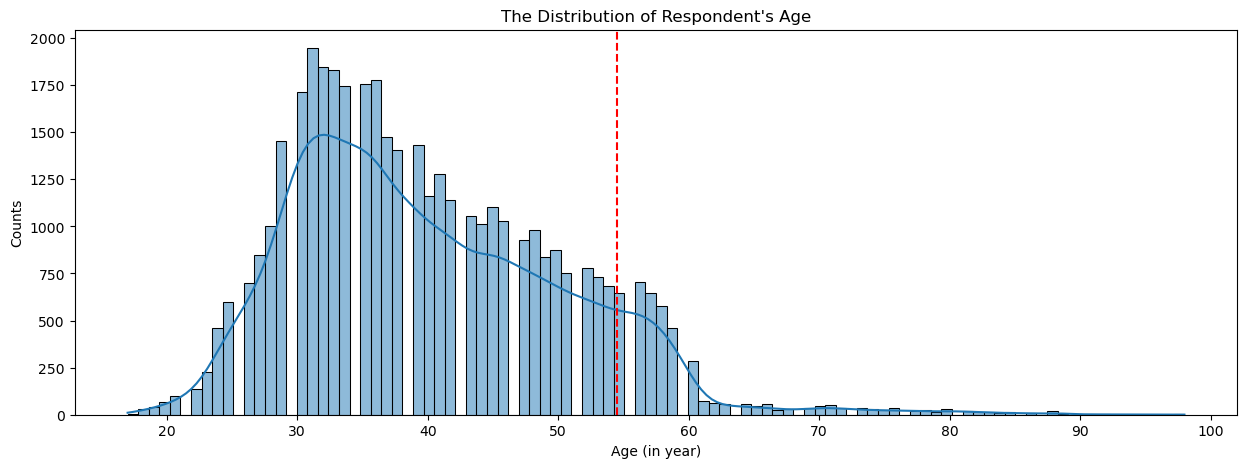

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
age,40.0238,17,32.0,38.0,47.0,98,15.0,10.42068,0.78456,24.5,54.5,5295,12.859433


In [37]:
hist_plotting(dataset=drop_df,
              x_column='age',
              plt_title="The Distribution of Respondent's Age",
              plt_xlabel='Age (in year)')

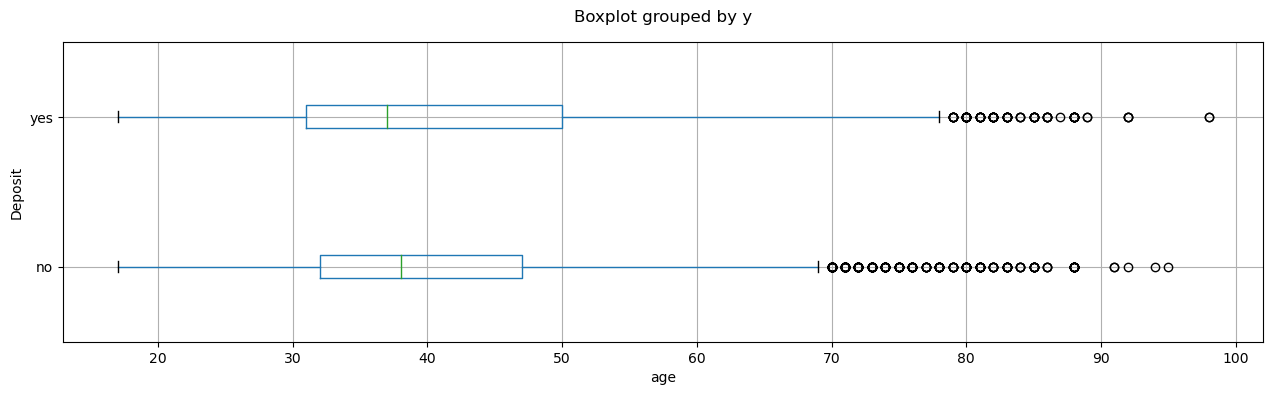

In [40]:
drop_df.boxplot(column=['age'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='age')
plt.title('')
plt.show()

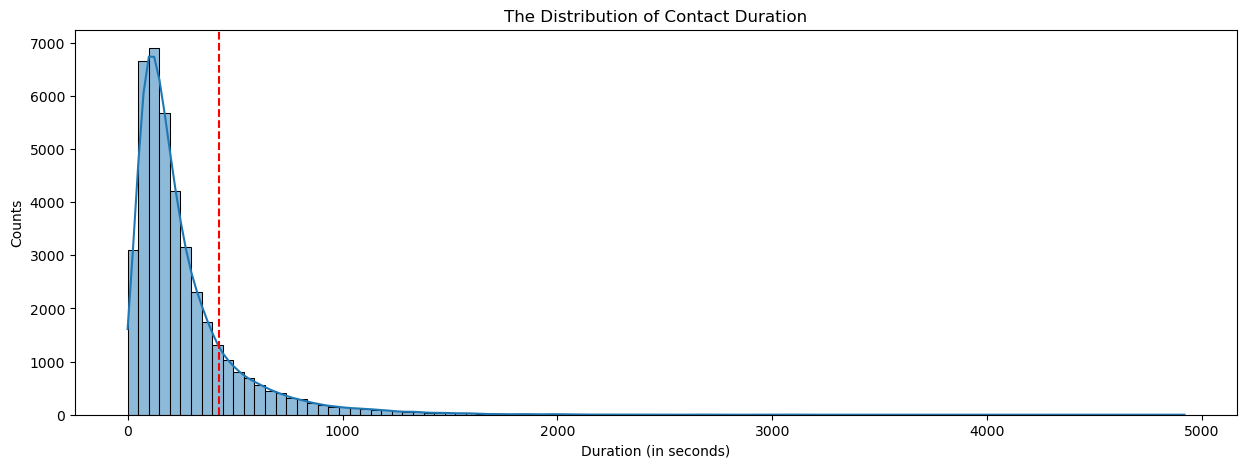

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
duration,258.315815,0,102.0,180.0,319.0,4918,217.0,259.305321,3.262808,-6.5,427.5,6445,15.652322


In [41]:
hist_plotting(dataset=drop_df,
              x_column='duration',
              plt_title="The Distribution of Contact Duration",
              plt_xlabel='Duration (in seconds)')

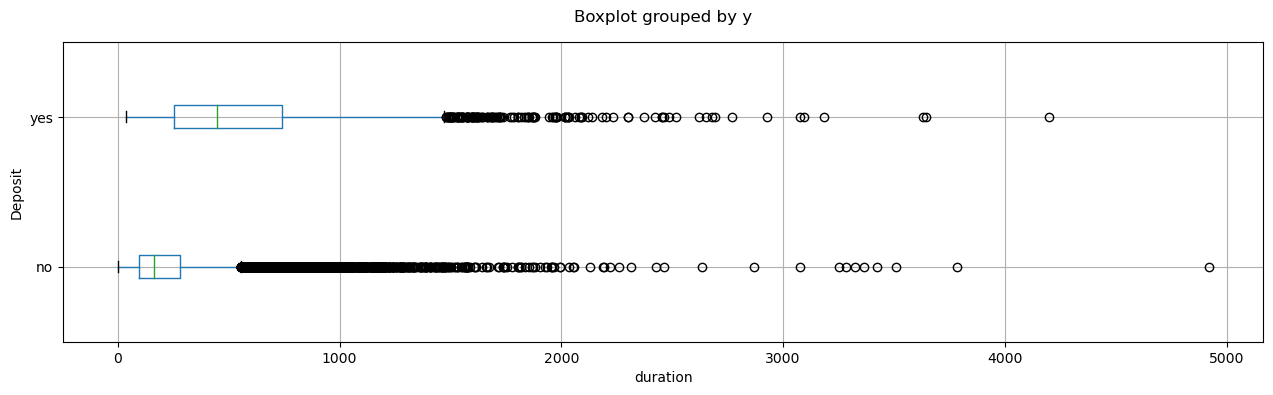

In [42]:
drop_df.boxplot(column=['duration'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='duration')
plt.title('')
plt.show()

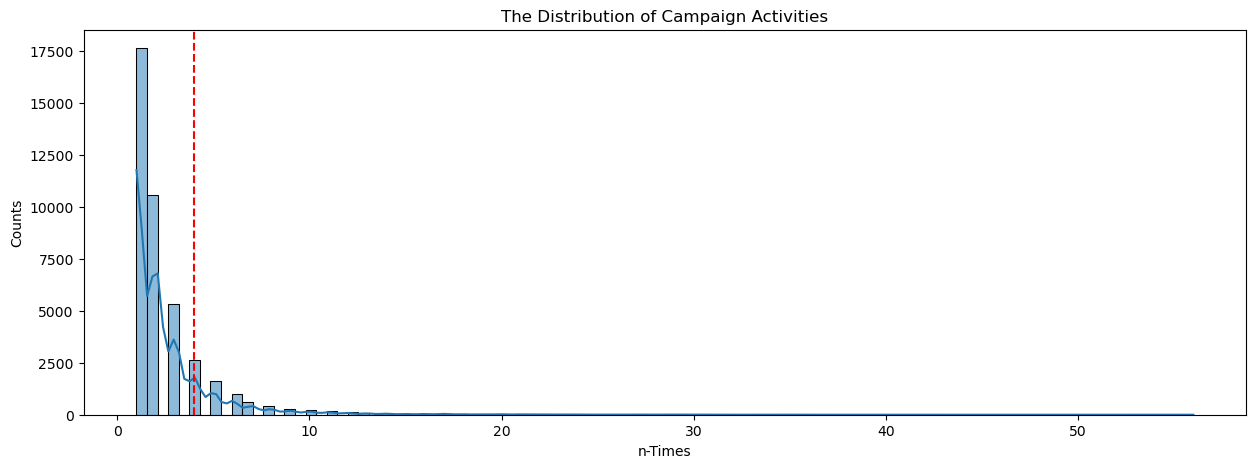

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
campaign,2.567879,1,1.0,2.0,3.0,56,2.0,2.770318,4.762044,0.0,4.0,4984,12.104138


In [43]:
hist_plotting(dataset=drop_df,
              x_column='campaign',
              plt_title="The Distribution of Campaign Activities",
              plt_xlabel='n-Times')

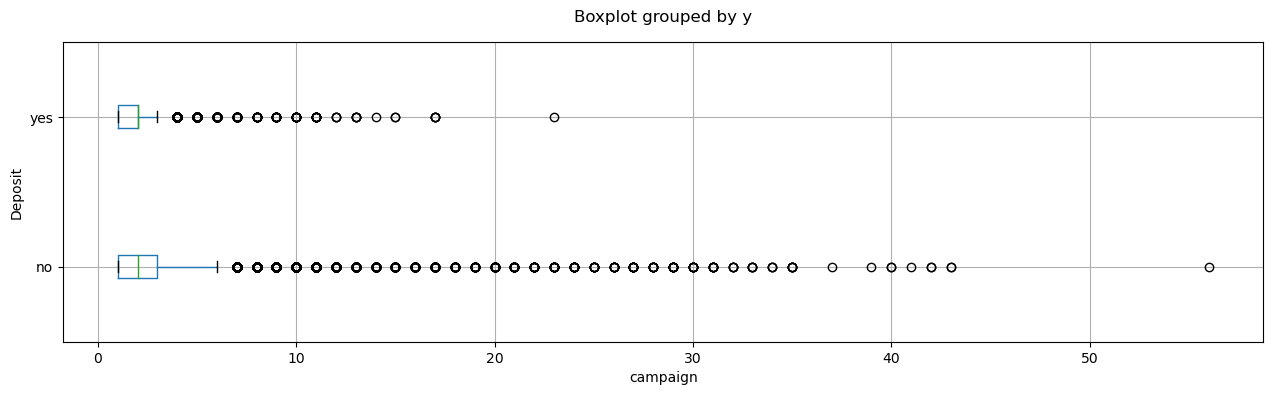

In [44]:
drop_df.boxplot(column=['campaign'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='campaign')
plt.title('')
plt.show()

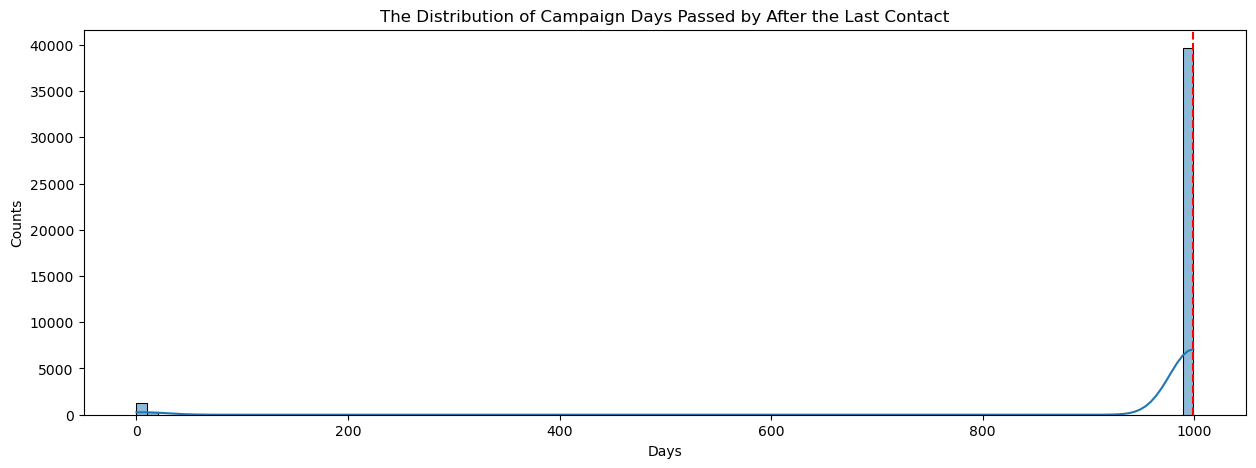

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
pdays,962.46481,0,999.0,999.0,999.0,999,0.0,186.937102,-4.921386,999.0,999.0,1515,3.679328


In [45]:
hist_plotting(dataset=drop_df,
              x_column='pdays',
              plt_title="The Distribution of Campaign Days Passed by After the Last Contact",
              plt_xlabel='Days')

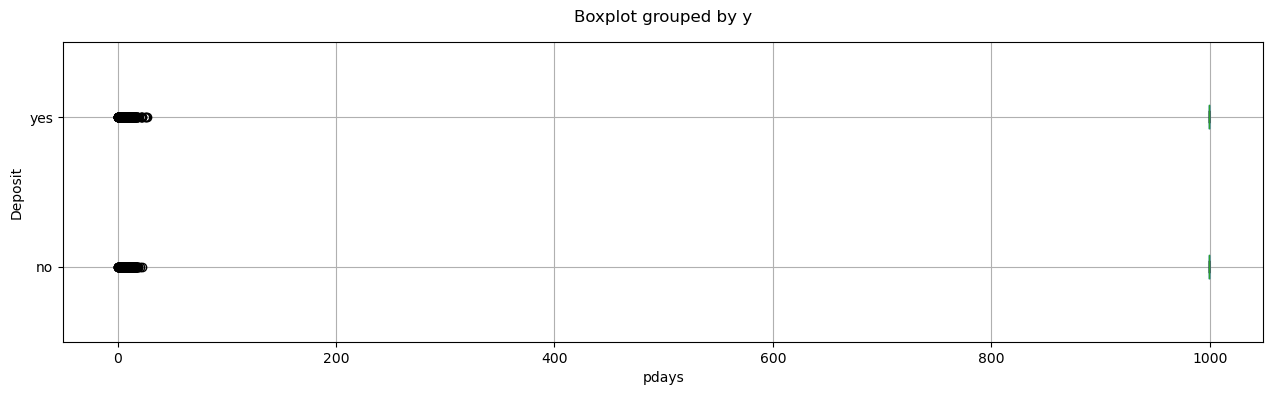

In [46]:
drop_df.boxplot(column=['pdays'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='pdays')
plt.title('')
plt.show()

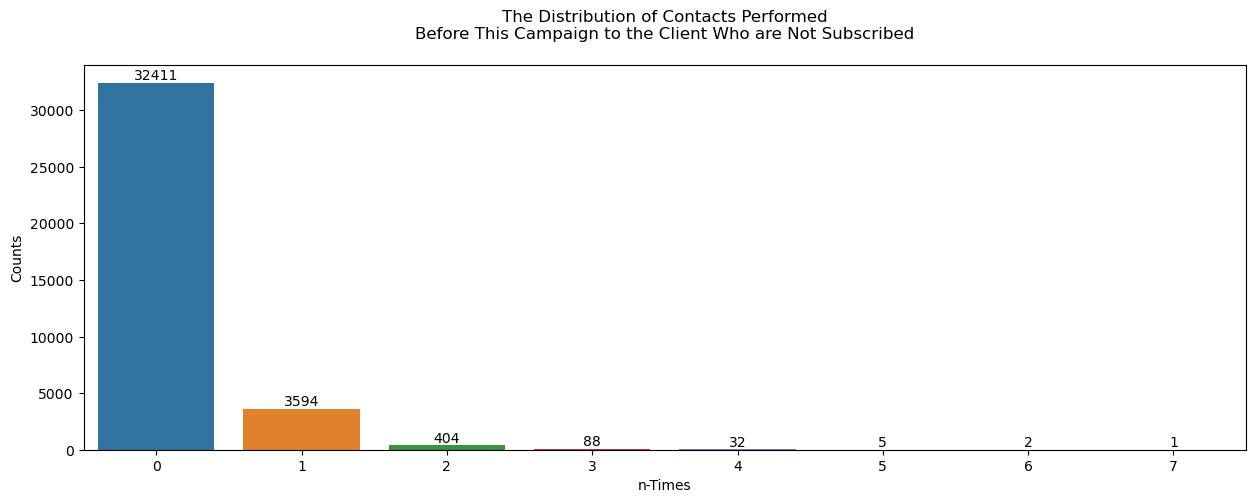

In [69]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=drop_df[drop_df['y'] == 'no'], x='previous')
ax.bar_label(ax.containers[0])
plt.title('The Distribution of Contacts Performed\nBefore This Campaign to the Client Who are Not Subscribed\n')
plt.xlabel('n-Times')
plt.ylabel('Counts')
plt.show()

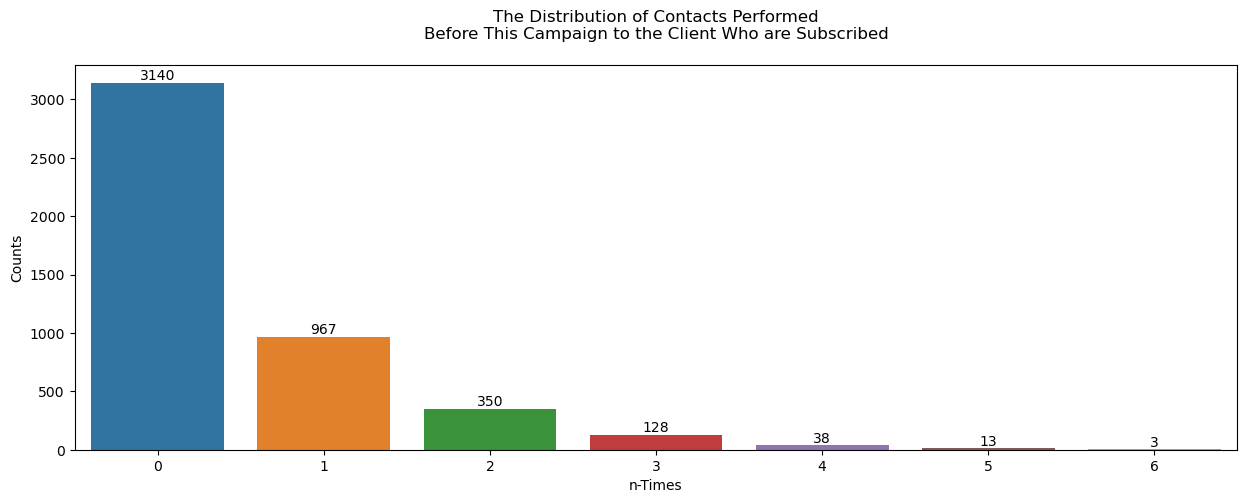

In [68]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=drop_df[drop_df['y'] == 'yes'], x='previous')
ax.bar_label(ax.containers[0])
plt.title('The Distribution of Contacts Performed\nBefore This Campaign to the Client Who are Subscribed\n')
plt.xlabel('n-Times')
plt.ylabel('Counts')
plt.show()

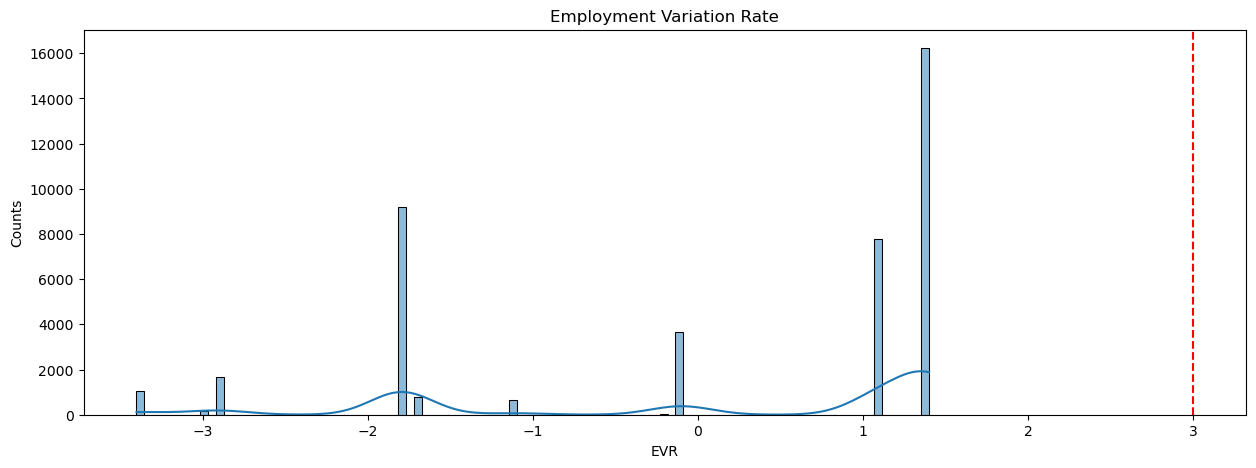

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
emp.var.rate,0.081922,-3.4,-1.8,1.1,1.4,1.4,3.2,1.570883,-0.724061,-3.4,3.0,0,0.0


In [50]:
hist_plotting(dataset=drop_df,
              x_column='emp.var.rate',
              plt_title="Employment Variation Rate",
              plt_xlabel='EVR')

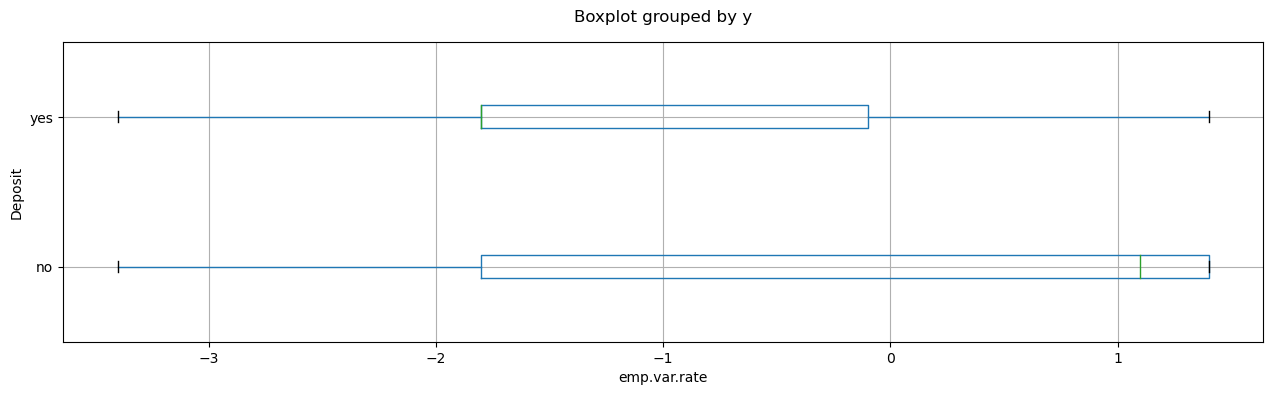

In [51]:
drop_df.boxplot(column=['emp.var.rate'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='emp.var.rate')
plt.title('')
plt.show()

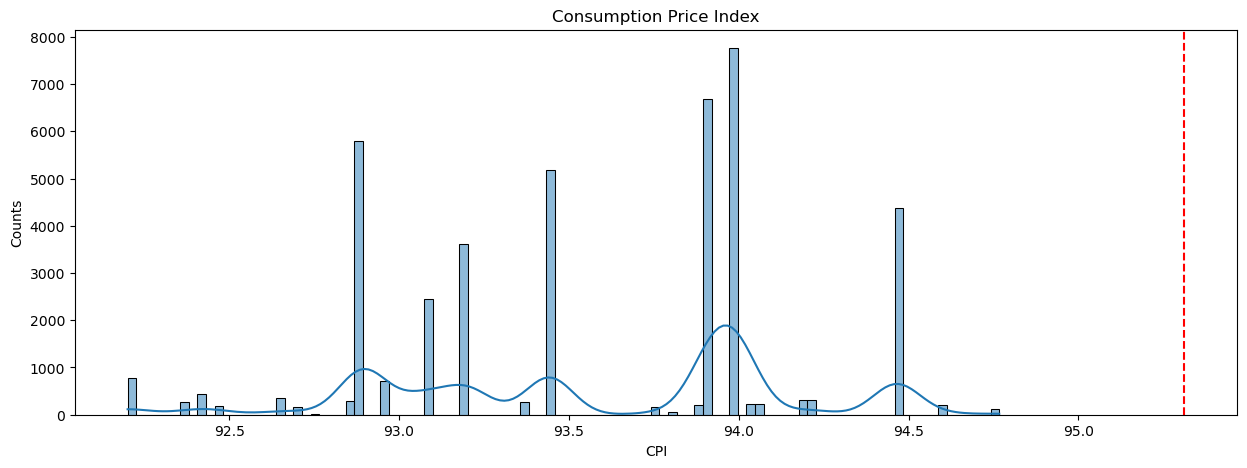

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
cons.price.idx,93.57572,92.201,93.075,93.749,93.994,94.767,0.919,0.578839,-0.230853,91.839203,95.312237,0,0.0


In [56]:
hist_plotting(dataset=drop_df,
              x_column='cons.price.idx',
              plt_title="Consumption Price Index",
              plt_xlabel='CPI')

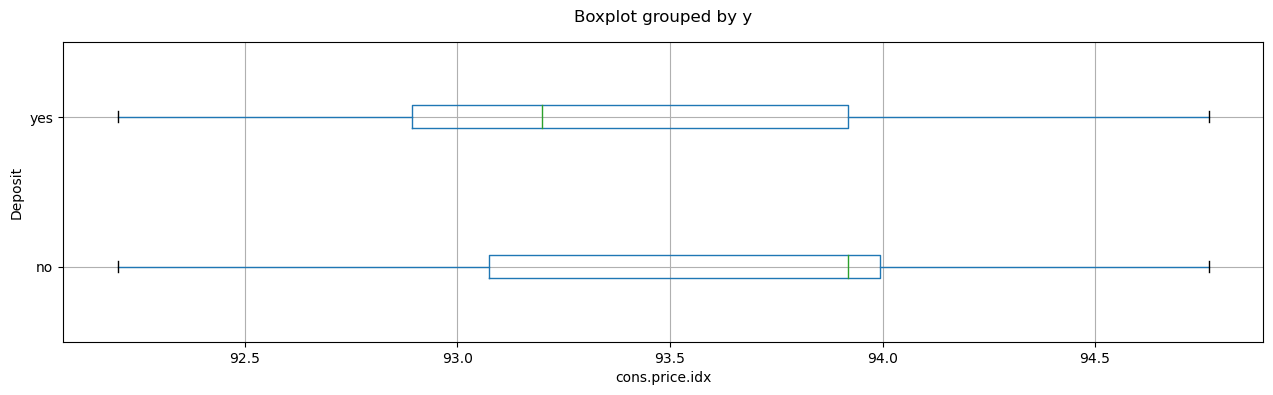

In [58]:
drop_df.boxplot(column=['cons.price.idx'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='cons.price.idx')
plt.title('')
plt.show()

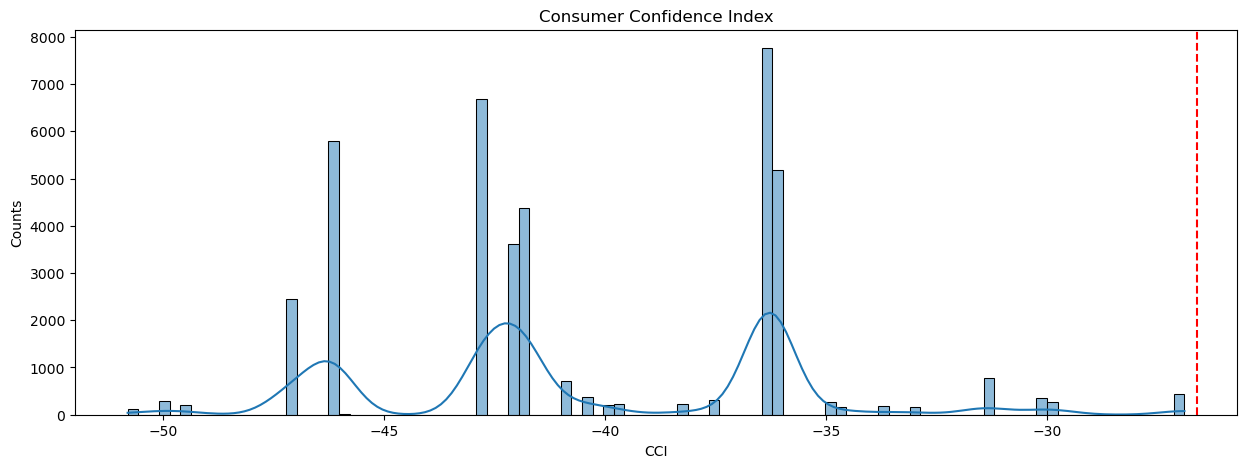

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
cons.conf.idx,-40.502863,-50.8,-42.7,-41.8,-36.4,-26.9,6.3,4.62786,0.302876,-54.386443,-26.619283,0,0.0


In [61]:
hist_plotting(dataset=drop_df,
              x_column='cons.conf.idx',
              plt_title="Consumer Confidence Index",
              plt_xlabel='CCI')

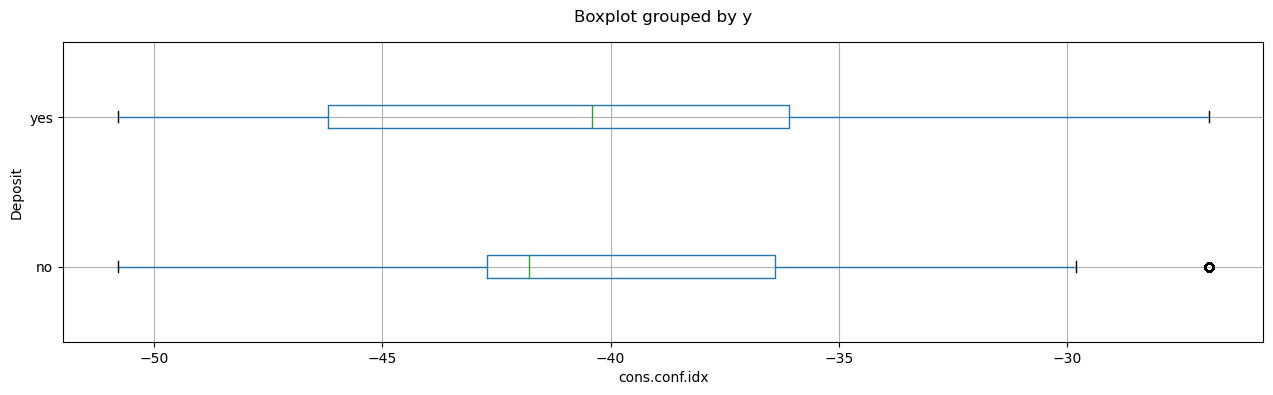

In [62]:
drop_df.boxplot(column=['cons.conf.idx'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='cons.conf.idx')
plt.title('')
plt.show()

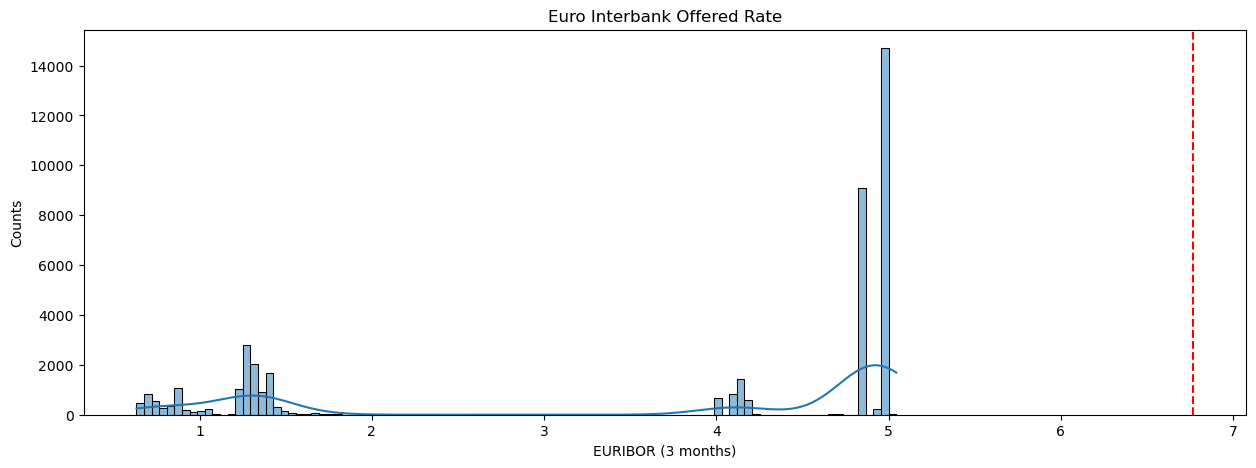

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
euribor3m,3.621293,0.634,1.344,4.857,4.961,5.045,3.617,1.734437,-0.709194,-0.4645,6.7695,0,0.0


In [59]:
hist_plotting(dataset=drop_df,
              x_column='euribor3m',
              plt_title="Euro Interbank Offered Rate",
              plt_xlabel='EURIBOR (3 months)')

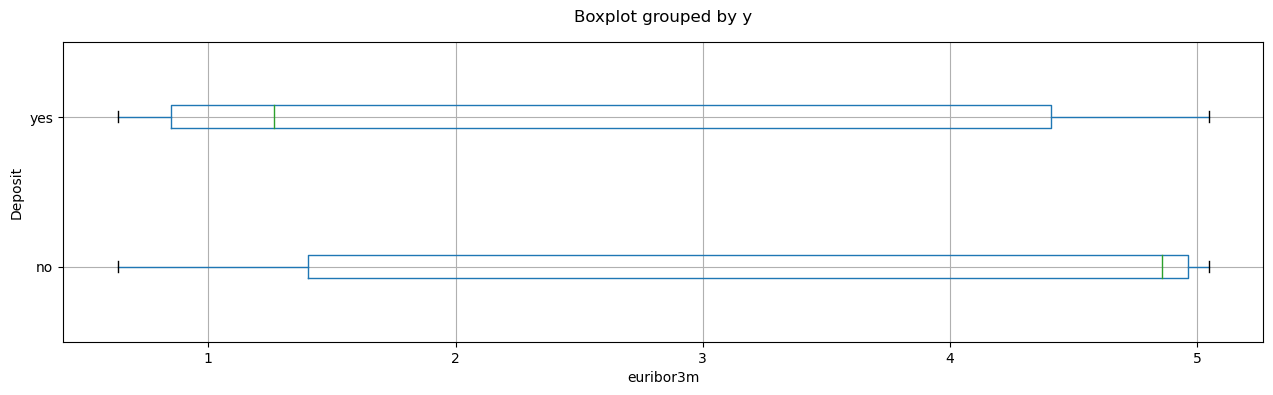

In [60]:
drop_df.boxplot(column=['euribor3m'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='euribor3m')
plt.title('')
plt.show()

In [91]:
def box_plotting(dataset, column):
    listVal = sorted(dataset[column].unique().tolist())
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=dataset, x=column, order=listVal)
    ax.bar_label(ax.containers[0])
    plt.title(f'Showcase of a Column "{column.capitalize()}"')
    plt.xlabel('')
    plt.ylabel('Counts')
    plt.show()
    count = []
    countPerc = []
    for i in range(len(listVal)):
        countEach = len(dataset[(dataset[column] == listVal[i])])
        count.append(countEach)
        countPerc.append(f'{round((countEach * 100)/len(dataset), 2)}%')
    dataCol = pd.DataFrame(data={'categories':listVal,
                                 'perc_count':countPerc})
    dataCol.set_index(keys='categories', inplace=True)
    display(dataCol.T)

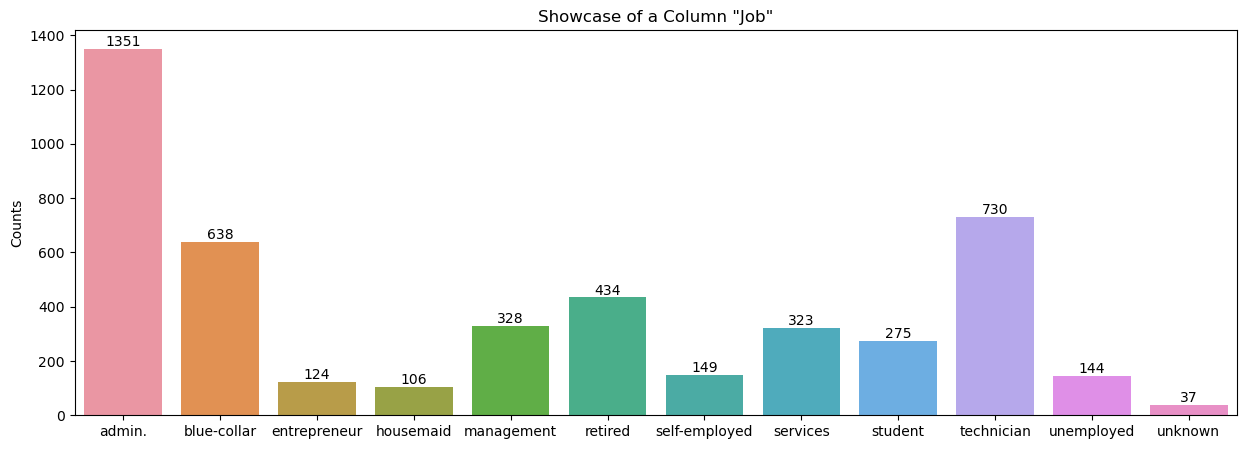

categories,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
perc_count,29.12%,13.75%,2.67%,2.28%,7.07%,9.36%,3.21%,6.96%,5.93%,15.74%,3.1%,0.8%


In [92]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='job')

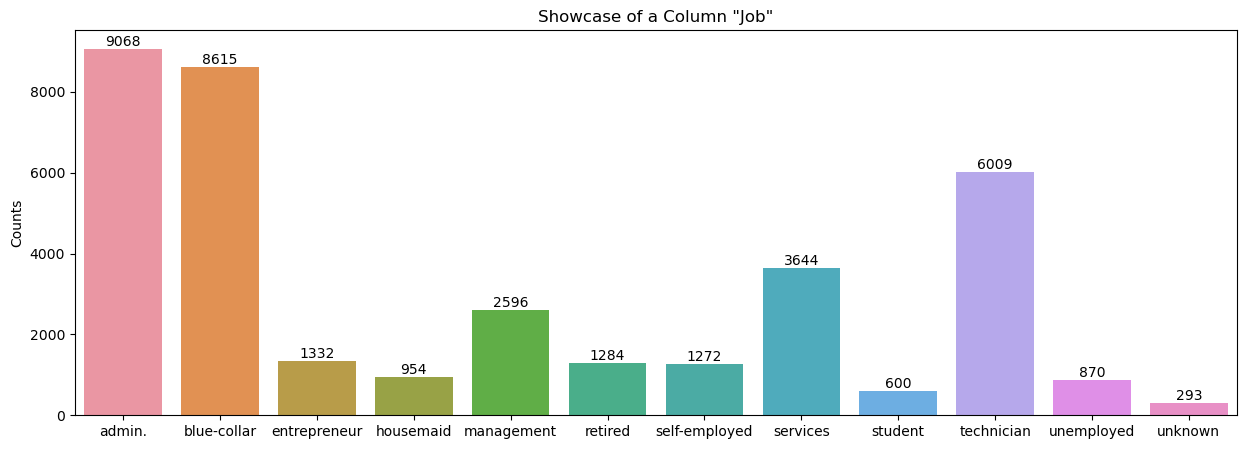

categories,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
perc_count,24.82%,23.58%,3.65%,2.61%,7.11%,3.51%,3.48%,9.97%,1.64%,16.45%,2.38%,0.8%


In [93]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='job')

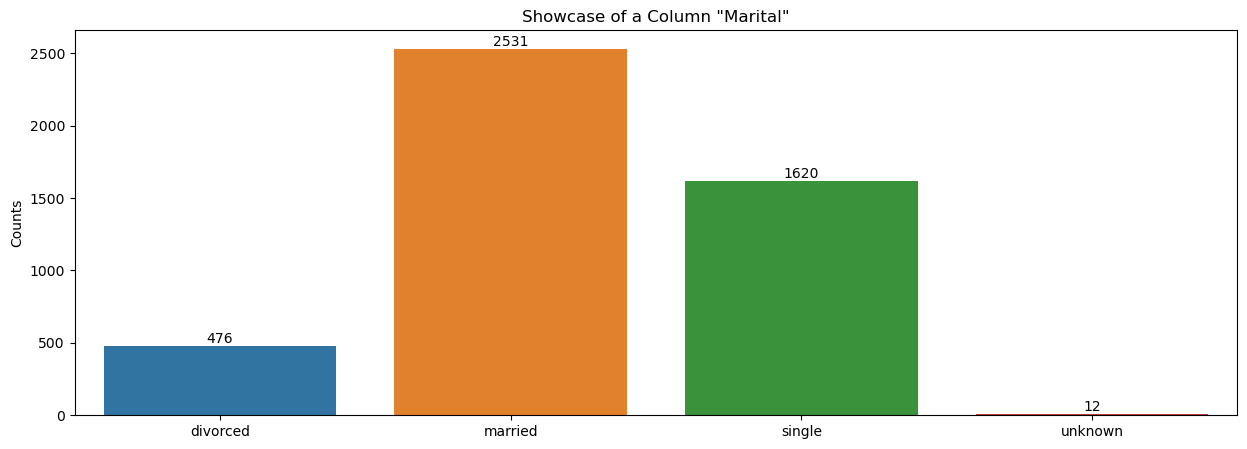

categories,divorced,married,single,unknown
perc_count,10.26%,54.56%,34.92%,0.26%


In [94]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='marital')

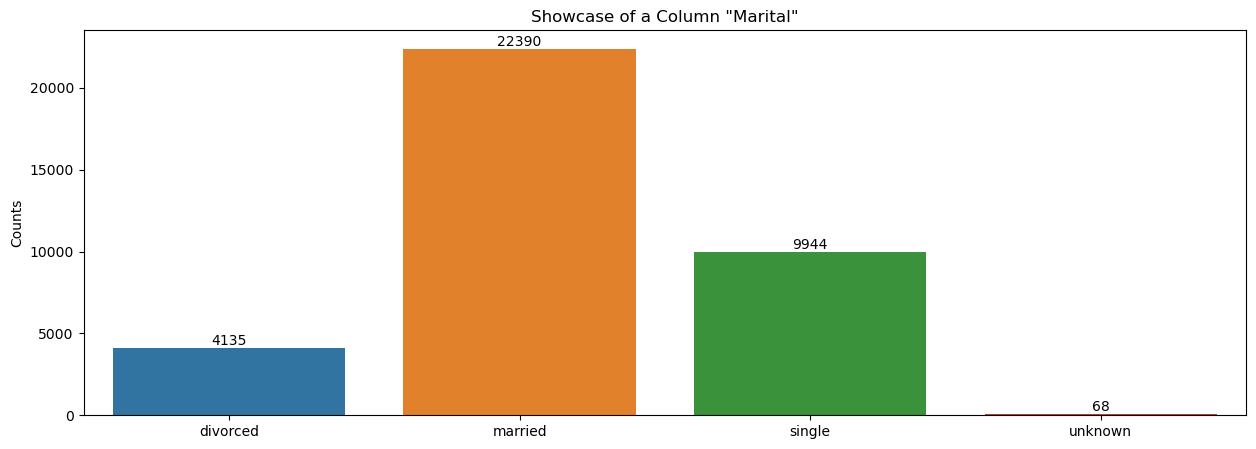

categories,divorced,married,single,unknown
perc_count,11.32%,61.28%,27.22%,0.19%


In [95]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='marital')

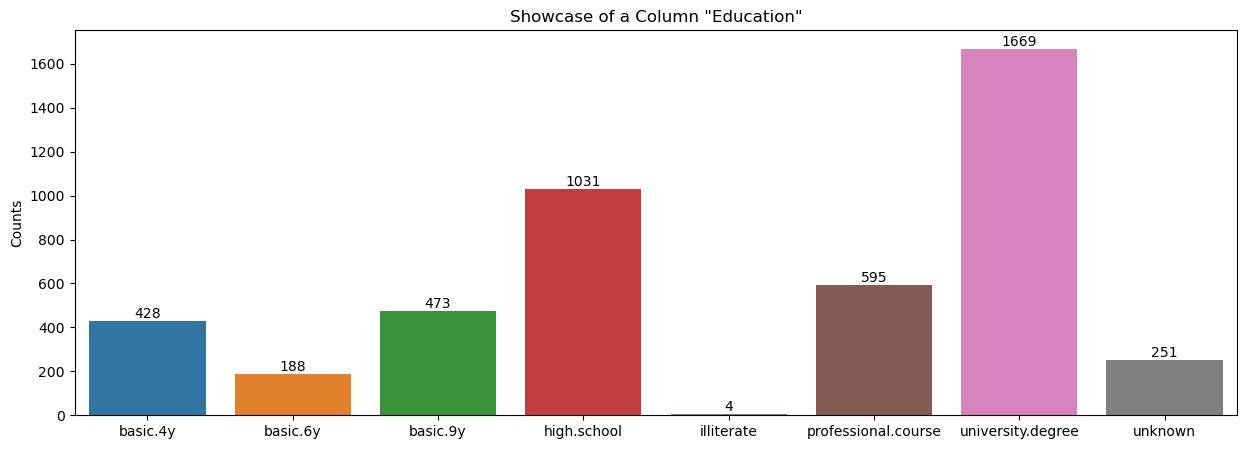

categories,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
perc_count,9.23%,4.05%,10.2%,22.22%,0.09%,12.83%,35.98%,5.41%


In [96]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='education')

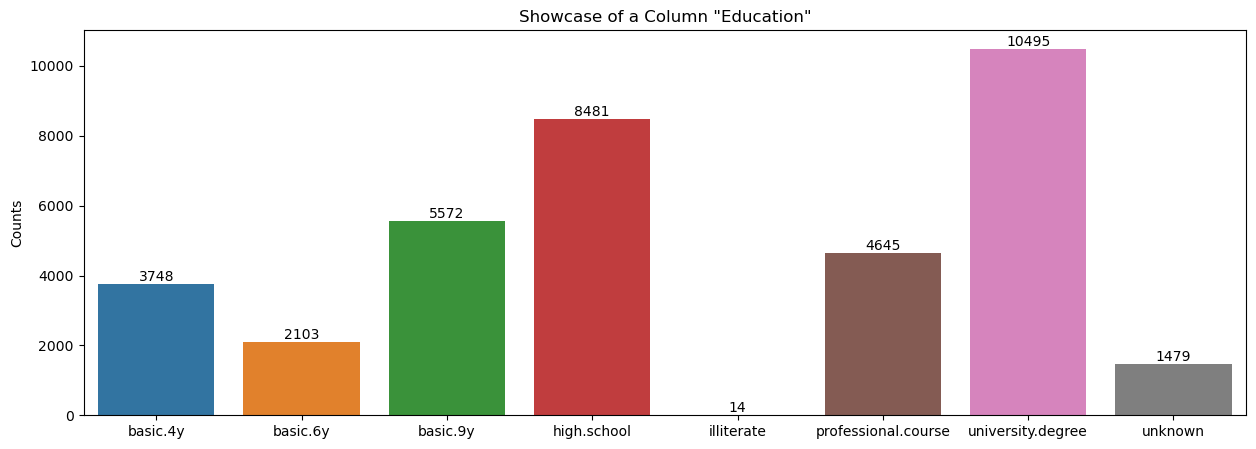

categories,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
perc_count,10.26%,5.76%,15.25%,23.21%,0.04%,12.71%,28.72%,4.05%


In [97]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='education')

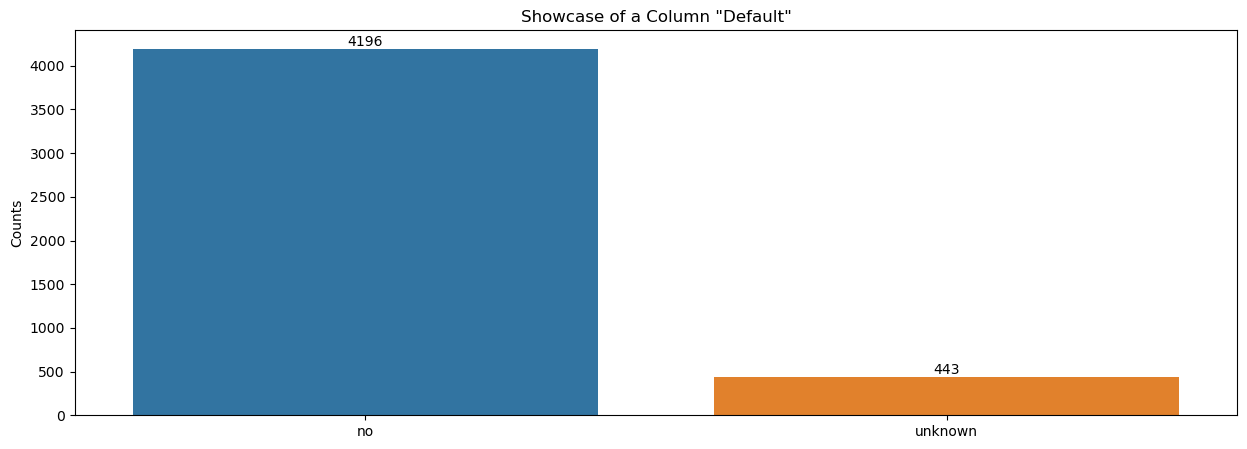

categories,no,unknown
perc_count,90.45%,9.55%


In [98]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='default')

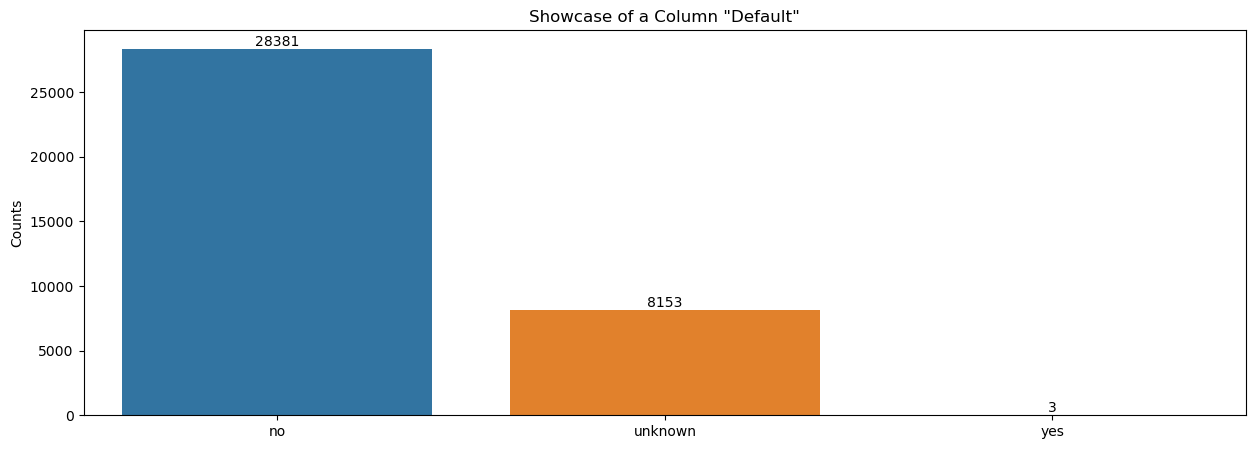

categories,no,unknown,yes
perc_count,77.68%,22.31%,0.01%


In [99]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='default')

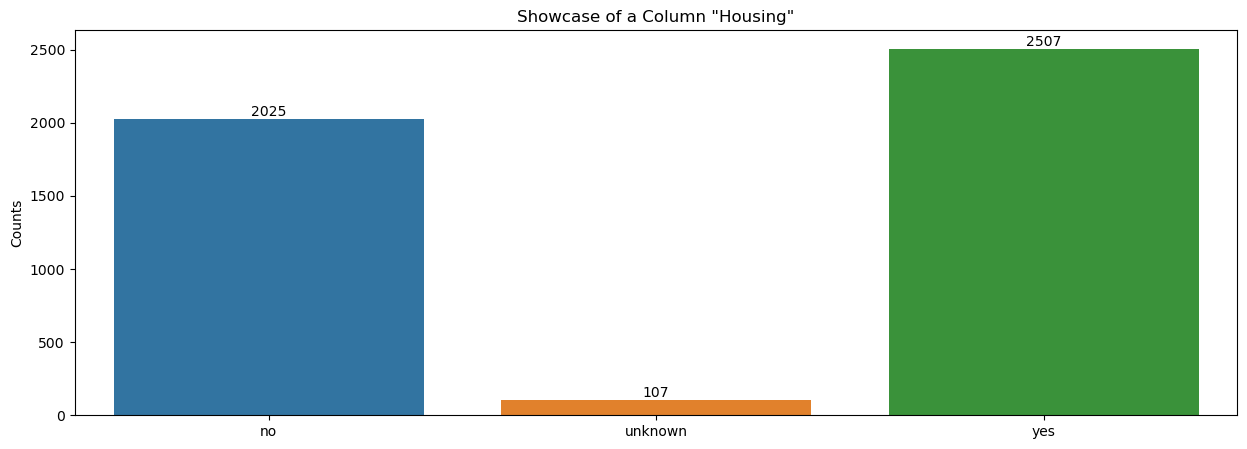

categories,no,unknown,yes
perc_count,43.65%,2.31%,54.04%


In [100]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='housing')

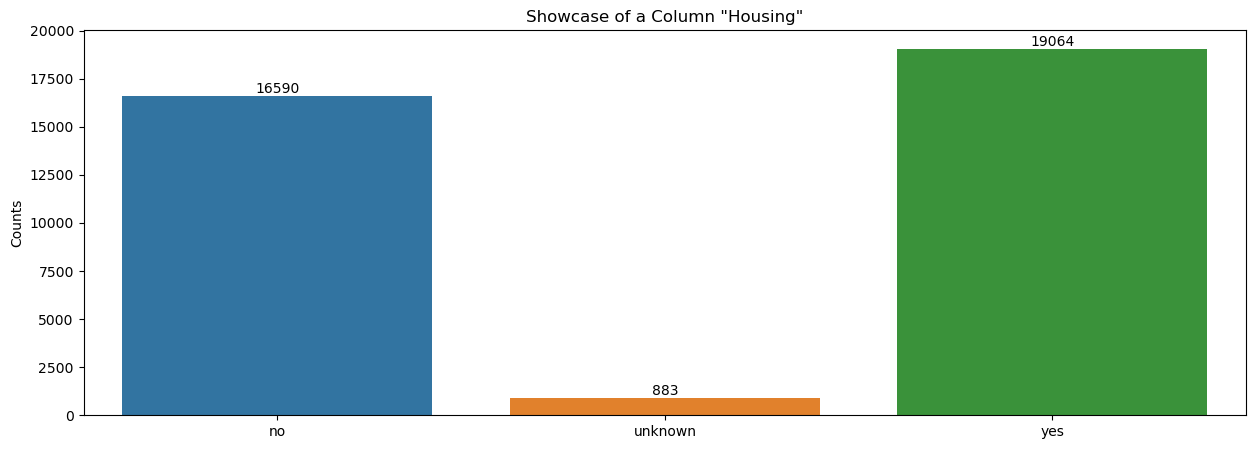

categories,no,unknown,yes
perc_count,45.41%,2.42%,52.18%


In [101]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='housing')

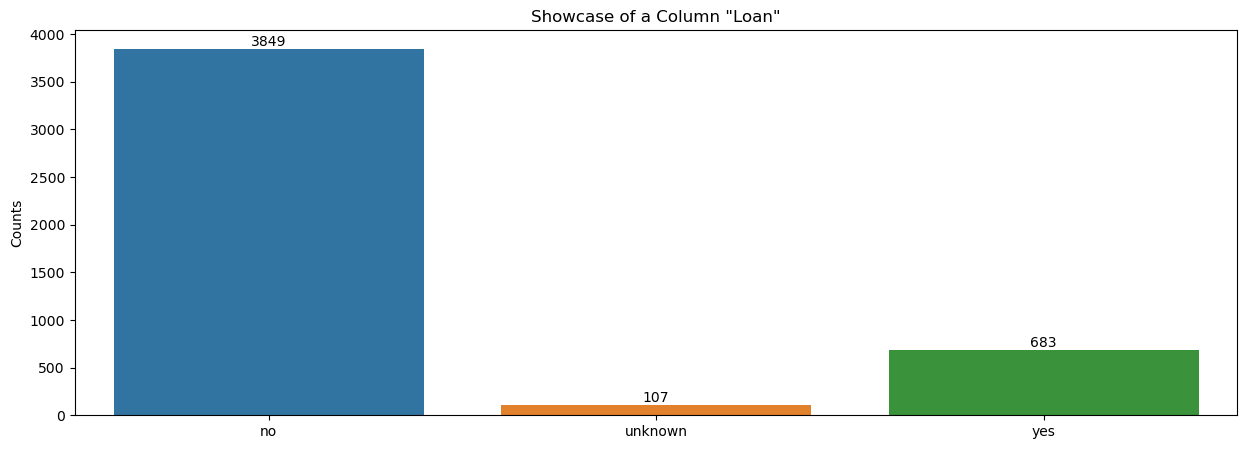

categories,no,unknown,yes
perc_count,82.97%,2.31%,14.72%


In [102]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='loan')

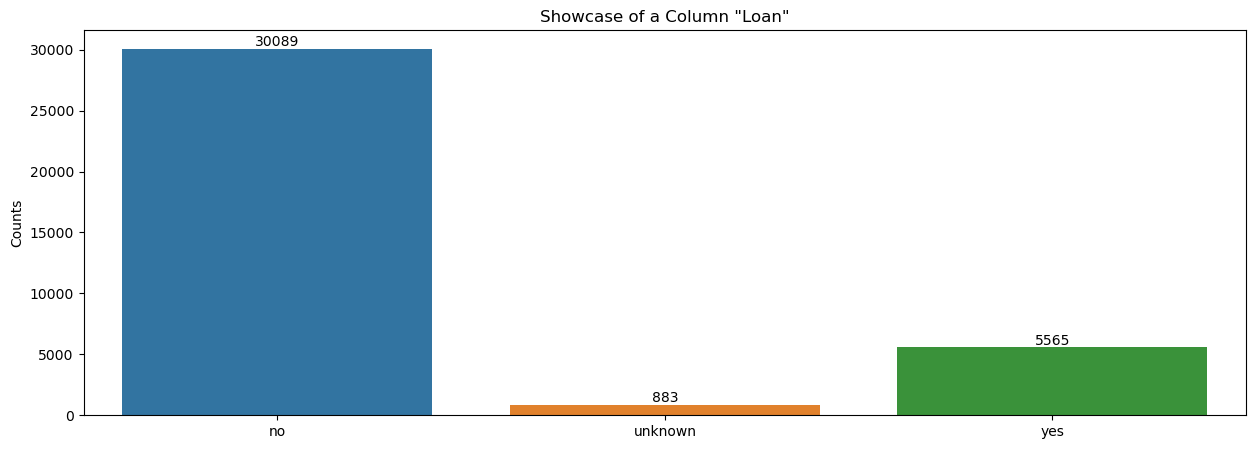

categories,no,unknown,yes
perc_count,82.35%,2.42%,15.23%


In [103]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='loan')

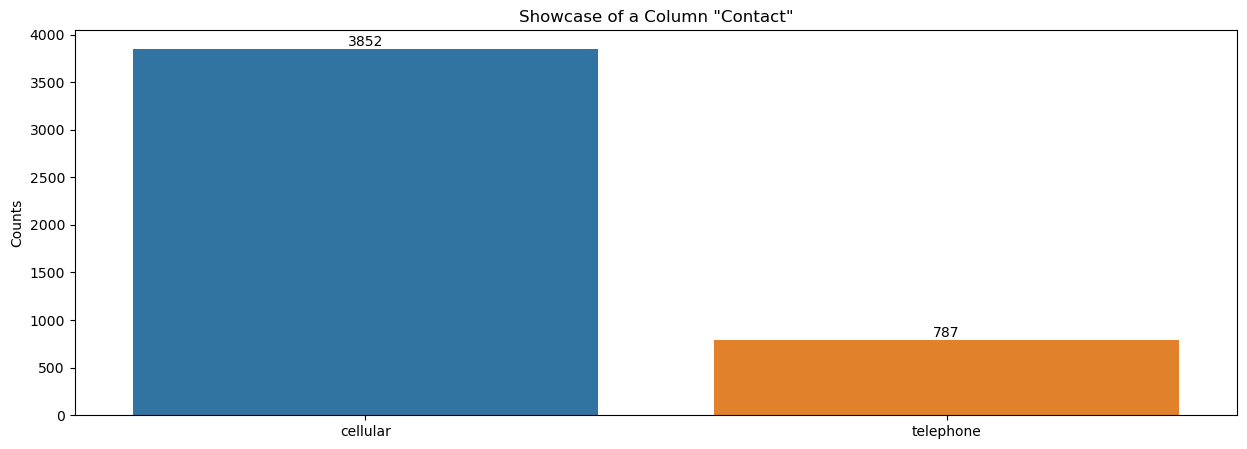

categories,cellular,telephone
perc_count,83.04%,16.96%


In [104]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='contact')

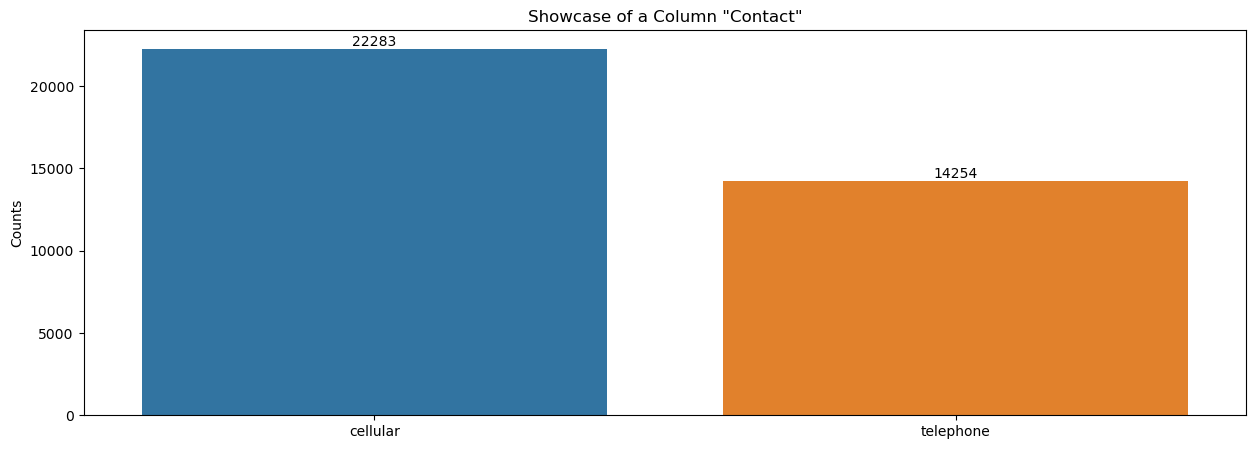

categories,cellular,telephone
perc_count,60.99%,39.01%


In [105]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='contact')

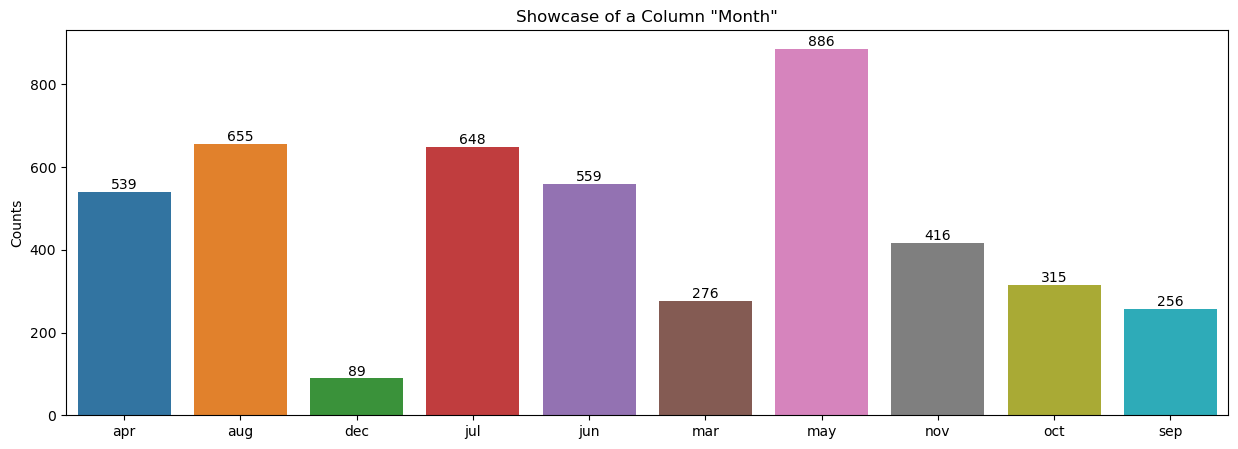

categories,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
perc_count,11.62%,14.12%,1.92%,13.97%,12.05%,5.95%,19.1%,8.97%,6.79%,5.52%


In [106]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='month')

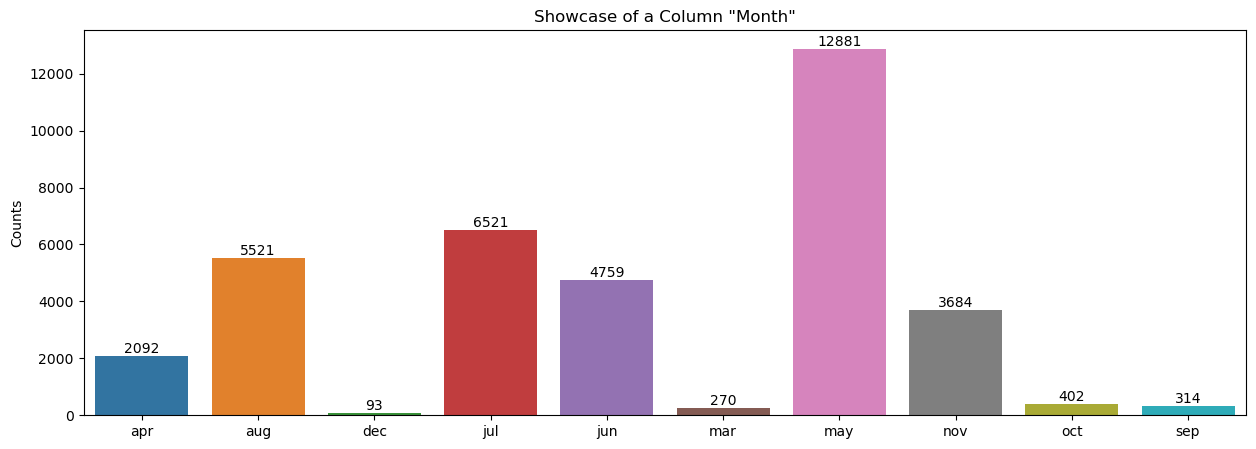

categories,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
perc_count,5.73%,15.11%,0.25%,17.85%,13.03%,0.74%,35.25%,10.08%,1.1%,0.86%


In [107]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='month')

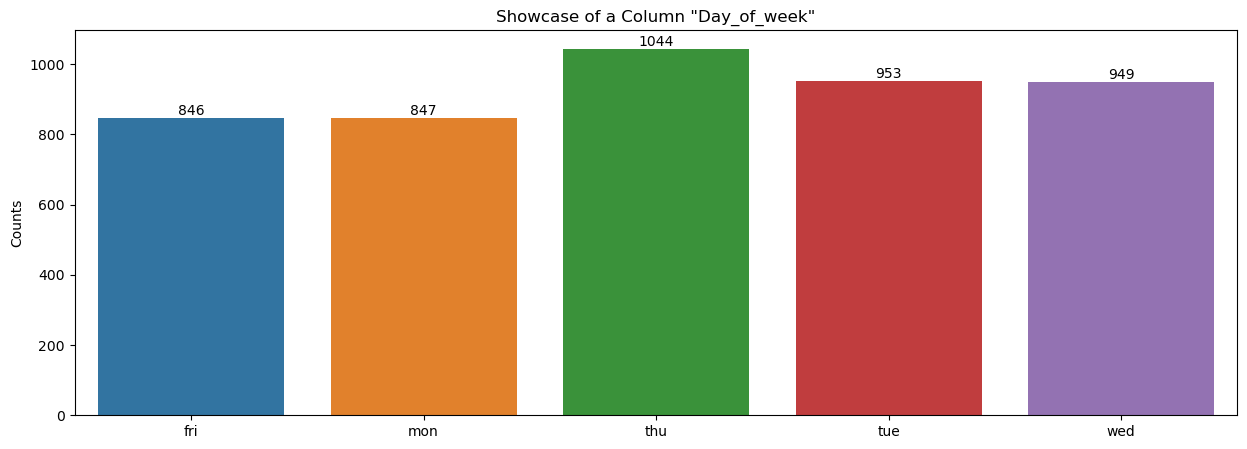

categories,fri,mon,thu,tue,wed
perc_count,18.24%,18.26%,22.5%,20.54%,20.46%


In [108]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='day_of_week')

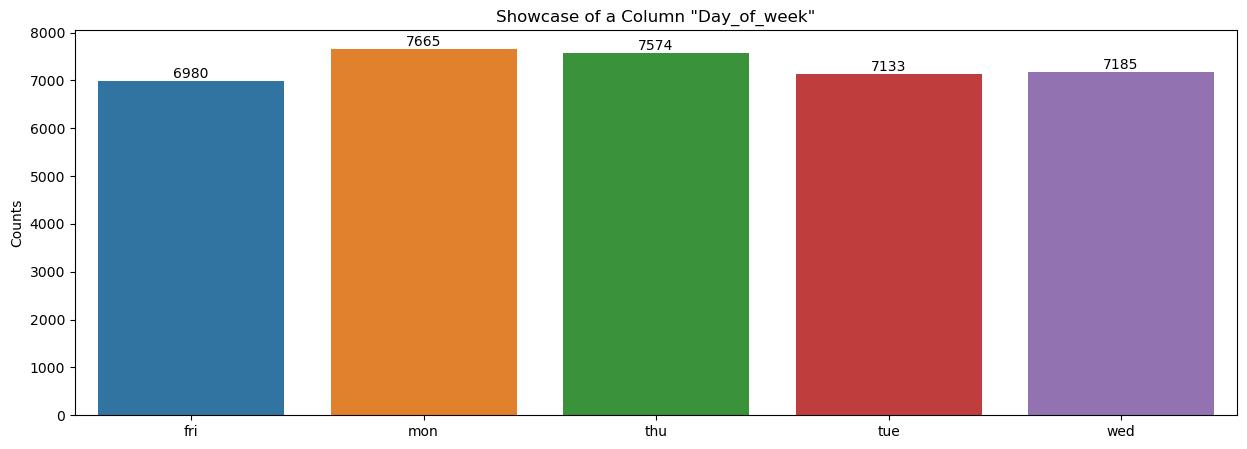

categories,fri,mon,thu,tue,wed
perc_count,19.1%,20.98%,20.73%,19.52%,19.66%


In [109]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='day_of_week')

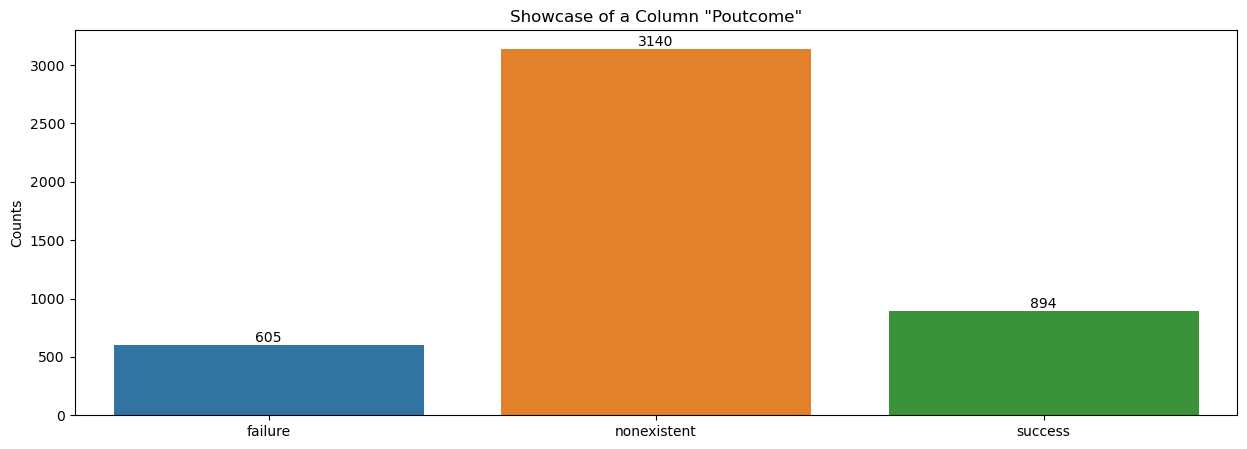

categories,failure,nonexistent,success
perc_count,13.04%,67.69%,19.27%


In [110]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='poutcome')

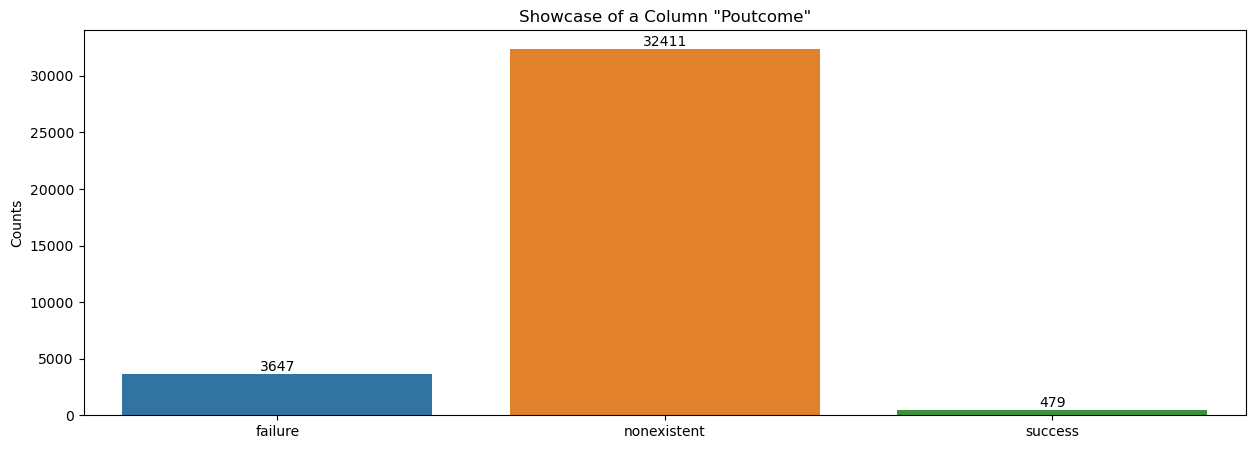

categories,failure,nonexistent,success
perc_count,9.98%,88.71%,1.31%


In [112]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='poutcome')

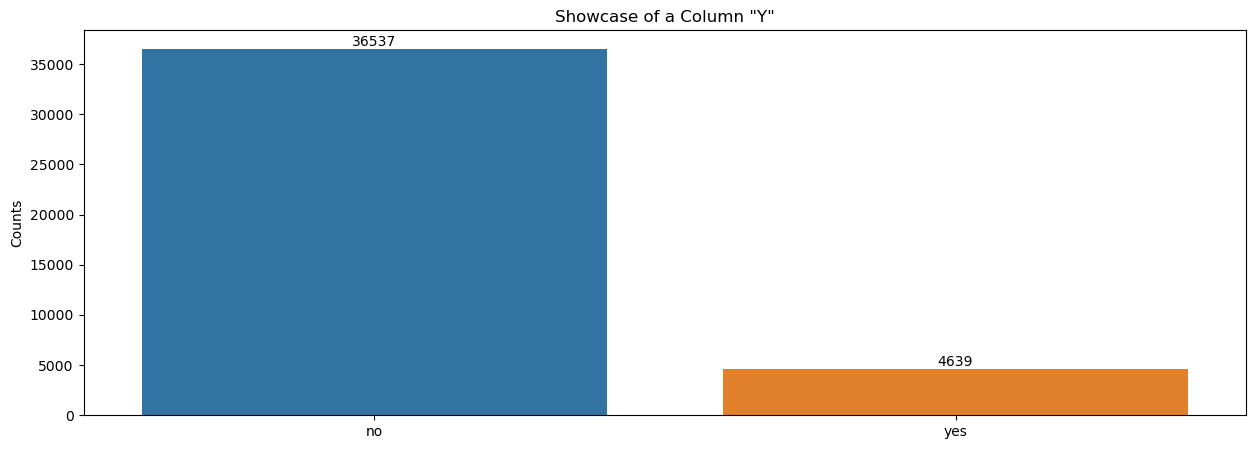

categories,no,yes
perc_count,88.73%,11.27%


In [113]:
box_plotting(dataset=drop_df,
             column='y')

# E. Data Cleaning

## E1. Rename Categorical Values in Column

In [121]:
new_df = drop_df.copy()

# Map job category
jobCol_categories = new_df['job'].unique().tolist()
newJobCol_cats = []
for each in jobCol_categories:
    newEach = each.capitalize()
    newEach = newEach.replace('.','')
    newJobCol_cats.append(newEach)
jobColReplace_Dict = dict(zip(jobCol_categories, newJobCol_cats))
new_df['job'] = new_df['job'].replace(jobColReplace_Dict)

# Map marital category
maritalCol_categories = new_df['marital'].unique().tolist()
newmaritalCol_cats = []
for each in maritalCol_categories:
    newEach = each.capitalize()
    newmaritalCol_cats.append(newEach)
maritalColReplace_Dict= dict(zip(maritalCol_categories, newmaritalCol_cats))
new_df['marital'] = new_df['marital'].replace(maritalColReplace_Dict)

# Map education category
educationCol_categories = new_df['education'].unique().tolist()
neweducationCol_cats = []
for each in educationCol_categories:
    newEach = each.replace('.', ' ')
    newEach = newEach.replace('4y', '(4 years)') if '4y' in newEach else newEach
    newEach = newEach.replace('6y', '(6 years)') if '6y' in newEach else newEach
    newEach = newEach.replace('9y', '(9 years)') if '9y' in newEach else newEach
    newEach = newEach.title()
    neweducationCol_cats.append(newEach)
educationColReplace_Dict= dict(zip(educationCol_categories, neweducationCol_cats))
new_df['education'] = new_df['education'].replace(educationColReplace_Dict)

# Map default category
defaultCol_categories = new_df['default'].unique().tolist()
newdefaultCol_cats = []
for each in defaultCol_categories:
    newEach = each.capitalize()
    newdefaultCol_cats.append(newEach)    
defaultColReplace_Dict= dict(zip(defaultCol_categories, newdefaultCol_cats))
new_df['default'] = new_df['default'].replace(defaultColReplace_Dict)

# Map housing category
housingCol_categories = new_df['housing'].unique().tolist()
newhousingCol_cats = []
for each in housingCol_categories:
    newEach = each.capitalize()
    newhousingCol_cats.append(newEach)    
housingColReplace_Dict= dict(zip(housingCol_categories, newhousingCol_cats))
new_df['housing'] = new_df['housing'].replace(housingColReplace_Dict)

# Map loan category
loanCol_categories = new_df['loan'].unique().tolist()
newloanCol_cats = []
for each in loanCol_categories:
    newEach = each.capitalize()
    newloanCol_cats.append(newEach)    
loanColReplace_Dict= dict(zip(loanCol_categories, newloanCol_cats))
new_df['loan'] = new_df['loan'].replace(housingColReplace_Dict)

# Map contact category
contactCol_categories = new_df['contact'].unique().tolist()
newcontactCol_cats = []
for each in contactCol_categories:
    newEach = each.capitalize()
    newcontactCol_cats.append(newEach)
contactColReplace_Dict= dict(zip(contactCol_categories, newcontactCol_cats))
new_df['contact'] = new_df['contact'].replace(contactColReplace_Dict)

# Map month category
monthCol_categories = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
newmonthCol_cats = [3,4,5,6,7,8,9,10,11,12]
monthColReplace_Dict= dict(zip(monthCol_categories, newmonthCol_cats))
new_df['month'] = new_df['month'].replace(monthColReplace_Dict)

# Map day_of_week category
day_of_weekCol_categories = ['mon', 'tue', 'wed', 'thu', 'fri']
newday_of_weekCol_cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
day_of_weekColReplace_Dict= dict(zip(day_of_weekCol_categories, newday_of_weekCol_cats))
new_df['day_of_week'] = new_df['day_of_week'].replace(day_of_weekColReplace_Dict)

# Map poutcome category
poutcomeCol_categories = new_df['poutcome'].unique().tolist()
newpoutcomeCol_cats = []
for each in poutcomeCol_categories:
    newEach = each.replace('non', 'non-') if 'non' in each else each
    newEach = newEach.capitalize()
    newpoutcomeCol_cats.append(newEach)
poutcomeColReplace_Dict= dict(zip(poutcomeCol_categories, newpoutcomeCol_cats))
new_df['poutcome'] = new_df['poutcome'].replace(poutcomeColReplace_Dict)

# Map y category
yCol_categories = new_df['y'].unique().tolist()
newyCol_cats = []
for each in yCol_categories:
    newEach = each.capitalize()
    newyCol_cats.append(newEach)
yColReplace_Dict= dict(zip(yCol_categories, newyCol_cats))
new_df['y'] = new_df['y'].replace(yColReplace_Dict)

In [122]:
new_df['loan'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [123]:
new_df.sample(8)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21388,40,Technician,Single,University Degree,No,Yes,No,Cellular,8,Tuesday,286,1,999,0,Non-existent,1.4,93.444,-36.1,4.963,5228.1,No
31370,35,Blue-collar,Married,Basic (9 Years),No,No,No,Cellular,5,Wednesday,145,1,999,0,Non-existent,-1.8,92.893,-46.2,1.334,5099.1,No
23200,47,Entrepreneur,Married,High School,No,Yes,Yes,Cellular,8,Tuesday,303,5,999,0,Non-existent,1.4,93.444,-36.1,4.965,5228.1,No
8619,53,Management,Married,University Degree,No,Unknown,Unknown,Telephone,6,Wednesday,232,1,999,0,Non-existent,1.4,94.465,-41.8,4.864,5228.1,No
29487,44,Blue-collar,Married,Basic (6 Years),No,Yes,Yes,Cellular,4,Monday,7,6,999,0,Non-existent,-1.8,93.075,-47.1,1.405,5099.1,No
33007,33,Services,Married,Basic (9 Years),No,Unknown,Unknown,Cellular,5,Monday,180,3,999,0,Non-existent,-1.8,92.893,-46.2,1.299,5099.1,No
5231,59,Technician,Divorced,University Degree,No,No,No,Telephone,5,Friday,281,2,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,No
6677,41,Management,Married,Basic (6 Years),No,Yes,No,Telephone,5,Wednesday,648,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,Yes
